In [8]:
import datashader as ds
import pandas as pd
from colorcet import fire
from datashader import transfer_functions as tf

In [2]:
# read the csv file
df = pd.read_csv('data/full.csv', index_col=0)

/home/theo/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/theo/.local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Address heatmap

In [6]:
# split coordinates into x and y
df['x'] = df['pos'].map(lambda el: float(el.split(' ')[0]))
df['y'] = df['pos'].map(lambda el: float(el.split(' ')[1]))

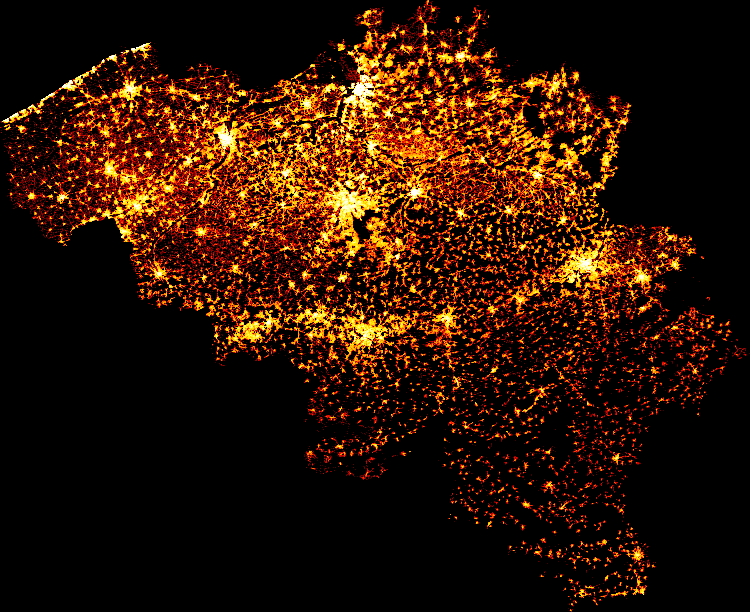

In [18]:
# set aspect ratio to be 1:1
plot_width  = 750
x_range = df['x'].max() - df['x'].min()
y_range = df['y'].max() - df['y'].min()
factor = y_range / x_range
plot_height = int(factor * plot_width)
# plot the data
agg = ds.Canvas(plot_width, plot_height).points(df, 'x', 'y')
tf.set_background(tf.shade(agg, cmap=fire),"black")